In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

In [8]:
print("Loading objective function values:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), '..', '..', 'Results','MPEC','01_1_Cetgorized'))
print("\t",files_path)

ncda = 9
# Loading data
files_name = 'objective.csv'
path = os.path.join(files_path,files_name)
data = pd.read_csv(path)

Loading objective function values:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\Results\MPEC\01_1_Cetgorized


In [9]:
# Drop Row Zero - Warmup row
data.drop(data[data.index==0].index, inplace=True)

In [10]:
# Dictionary for DAs categories
categories = dict()

for j in range(1,ncda+1):
    if j %2 == 0:
        categories['DA'+str(j)] = "CAT_01"
    elif j % 3== 0:
        categories['DA'+str(j)] = "CAT_02"
    elif j % 5 == 0:
        categories['DA'+str(j)] = "CAT_03"
    else:
        categories['DA'+str(j)] = "CAT_04"

In [13]:
SW  = []
CAT = []
DA =  []
Bus = []
DA_Bus=['Bus6', 'Bus6', 'Bus6', 'Bus4', 'Bus4', 'Bus4', 'Bus5', 'Bus5', 'Bus5' ]
for i in range(1, ncda+1):
    SW.append(data[str(i)].item())
    CAT.append(categories['DA'+str(i)])
    DA.append('DA'+str(i))
    Bus.append(DA_Bus[i-1])
    
df = pd.DataFrame({'SW':SW,
                  'CAT':CAT,
                  'DA':DA,
                  'Bus':Bus})

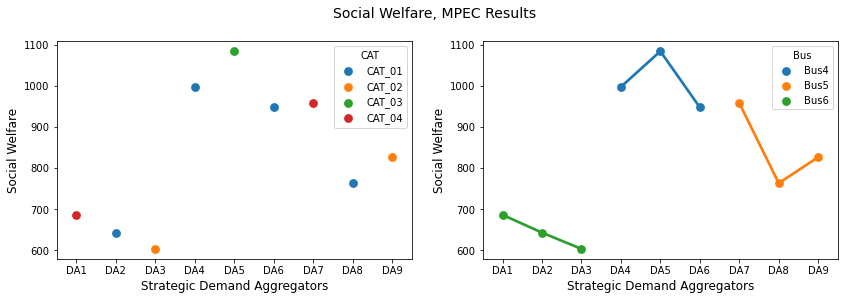

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# sns.barplot(data= df.groupby(['CAT']).mean().reset_index(),
#             x='CAT', y='SW', hue='category', ax=axes[0])


order=['CAT_01', 'CAT_02', 'CAT_03', 'CAT_04']
sns.pointplot(data=df, x='DA', y='SW', hue='CAT', hue_order=order, ax=axes[0]);
axes[0].set_title("", fontsize=12)
axes[0].set_xlabel('Strategic Demand Aggregators',fontsize=12);
axes[0].set_ylabel('Social Welfare',fontsize=12);

order=['Bus4', 'Bus5', 'Bus6']
sns.pointplot(data=df, x='DA', y='SW', hue='Bus',hue_order=order, ax=axes[1]);
axes[1].set_title("", fontsize=12)
axes[1].set_xlabel('Strategic Demand Aggregators',fontsize=12);
axes[1].set_ylabel('Social Welfare',fontsize=12);

fig.suptitle('Social Welfare, MPEC Results', fontsize=14, y=1.);